In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [162]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        yield name
imports = list(set(get_imports()))
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

matplotlib==3.5.2
numpy==1.21.5
pandas==1.4.4


## Loading Data

In [2]:
df1 = pd.read_csv("Bengaluru_house_data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

## Data cleaning

In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna()
df3.shape

(13246, 5)

In [8]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk'] = df3['size'].copy()
df3['bhk'] = df3['bhk'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

/var/folders/70/6mdh7ckj7nz56t9705xll_bh0000gn/T/ipykernel_81987/1531011250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].copy()
/var/folders/70/6mdh7ckj7nz56t9705xll_bh0000gn/T/ipykernel_81987/1531011250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['bhk'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
df3.bhk.value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

In [15]:
df4 = df3[df3.bhk <= 10]

In [17]:
df4.bhk.value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
Name: bhk, dtype: int64

In [16]:
df4 = df4.drop(columns=['size'])

In [22]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13234 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13234 non-null  object 
 1   total_sqft  13234 non-null  object 
 2   bath        13234 non-null  float64
 3   price       13234 non-null  float64
 4   bhk         13234 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 620.3+ KB


In [23]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


total_sqrt looks like a float column but has datatype object

In [24]:
def check_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df_temp = df4[~df4.total_sqft.apply(check_float)]

In [29]:
df_temp.head(30)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [30]:
df_temp.loc[410].total_sqft

'34.46Sq. Meter'

In [40]:
float('887test_str')

ValueError: could not convert string to float: '887test_str'

In [32]:
import re
float(re.findall(r'(\d+)(\w+)', '887test_str')[0][0])

887.0

In [39]:
re.findall(r'(\w+)', '887test_str')

['887test_str']

In [41]:
re.findall(r'(\d+(\.\d+)?)(\w+)', '38.7Sq. Meter')

[('38.7', '.7', 'Sq')]

In [35]:
re.findall(r'(\d+(\.\d+)?)(\w*)', df_temp.loc[410].total_sqft)

[('34.46', '.46', 'Sq')]

In [42]:
re.findall(r'(\d+(\.\d+)?)(\w*)', '1056')[0][0]

'1056'

Can extract digits but will have to do unit convestion too

In [54]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [55]:
df_temp.total_sqft[:10]

30        2100 - 2850
122       3067 - 8156
137       1042 - 1105
165       1145 - 1340
188       1015 - 1540
410    34.46Sq. Meter
549       1195 - 1440
648         4125Perch
661       1120 - 1145
672       3090 - 5002
Name: total_sqft, dtype: object

In [56]:
df_temp.total_sqft[:10].apply(convert_sqft_to_num)

30     2475.0
122    5611.5
137    1073.5
165    1242.5
188    1277.5
410       NaN
549    1317.5
648       NaN
661    1132.5
672    4046.0
Name: total_sqft, dtype: float64

In [57]:
df5 = df4.copy()
df5.total_sqft = df5.total_sqft.apply(convert_sqft_to_num)

In [59]:
df5 = df5.dropna()

In [60]:
df5.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [61]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13188 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13188 non-null  object 
 1   total_sqft  13188 non-null  float64
 2   bath        13188 non-null  float64
 3   price       13188 non-null  float64
 4   bhk         13188 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 618.2+ KB


In [62]:
df5

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [63]:
df5.bath.value_counts()

2.0     6893
3.0     3274
4.0     1222
1.0      781
5.0      521
6.0      267
7.0      102
8.0       64
9.0       40
10.0      13
12.0       6
11.0       2
13.0       2
14.0       1
Name: bath, dtype: int64

In [64]:
df6 = df5[df5.bath < 8]

In [65]:
df6

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [66]:
df6.location = df6.location.apply(lambda x: x.strip())

/var/folders/70/6mdh7ckj7nz56t9705xll_bh0000gn/T/ipykernel_81987/3773239030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.location = df6.location.apply(lambda x: x.strip())


In [67]:
df6.location.value_counts()

Whitefield                        533
Sarjapur  Road                    392
Electronic City                   303
Kanakpura Road                    264
Thanisandra                       234
                                 ... 
1A Block Koramangala                1
asha township, off hennur road      1
Escorts Colony                      1
Rahat Bagh                          1
Abshot Layout                       1
Name: location, Length: 1268, dtype: int64

In [68]:
len(df6.location.value_counts()[df6.location.value_counts() < 15])

1083

There are total 1268 different locations with 1083 having less than 15 properties. 

In [69]:
location_less_than_15 = df6.location.value_counts()[df6.location.value_counts() < 15]

In [70]:
location_less_than_15

Murugeshpalya                     14
Jalahalli East                    14
NGR Layout                        14
NRI Layout                        14
Giri Nagar                        14
                                  ..
1A Block Koramangala               1
asha township, off hennur road     1
Escorts Colony                     1
Rahat Bagh                         1
Abshot Layout                      1
Name: location, Length: 1083, dtype: int64

In [71]:
df6.location = df6.location.apply(lambda x: 'Other' if x in location_less_than_15 else x)

/var/folders/70/6mdh7ckj7nz56t9705xll_bh0000gn/T/ipykernel_81987/3935145385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.location = df6.location.apply(lambda x: 'Other' if x in location_less_than_15 else x)


In [72]:
df6.location.value_counts()

Other                  3484
Whitefield              533
Sarjapur  Road          392
Electronic City         303
Kanakpura Road          264
                       ... 
Judicial Layout          15
Sector 2 HSR Layout      15
Nagavarapalya            15
Arekere                  15
Kodihalli                15
Name: location, Length: 186, dtype: int64

## Adding a Column

In [74]:
df7 = df6.copy()
df7['price_per_sqft'] = df7['price']*100000/df7['total_sqft']

In [76]:
df7.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


## Outlier Removal

**Looking for properties having area per number of rooms less than 300. This is not very logically irl and might be outliers.**

In [77]:
df7[df7.total_sqft/df7.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Other,1020.0,6.0,370.0,6,36274.509804
58,Other,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Other,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,22.0,2,4782.608696


In [78]:
df7 = df7[~(df7.total_sqft/df7.bhk<300)]
df7.shape

(12403, 6)

**Removing data samples having too high or too low price/square feet**

In [80]:
df7.price_per_sqft.describe()

count     12403.000000
mean       6294.487278
std        4112.890761
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6907.516056
max      176470.588235
Name: price_per_sqft, dtype: float64

In [82]:
p_mean = df7.price_per_sqft.mean()
p_std = df7.price_per_sqft.std()
p_mean, p_std

(6294.487278093173, 4112.890761288302)

In [95]:
len(df7[df7.price_per_sqft < p_mean - p_std])

43

In [96]:
len(df7[df7.price_per_sqft > p_mean + p_std])

1137

In [105]:
len(df7[((df7.price_per_sqft < p_mean - p_std) | (df7.price_per_sqft > p_mean + p_std))])

1180

In [106]:
df8 = df7[~((df7.price_per_sqft < p_mean - p_std) | (df7.price_per_sqft > p_mean + p_std))]

In [107]:
len(df8)

11223

**Removing data samples having more number of baths than rooms**

In [108]:
df8

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [109]:
df8[df8.bath>df8.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
7709,Other,2460.0,7.0,80.0,4,3252.03252
12103,Thanisandra,1806.0,6.0,116.0,3,6423.03433


In [110]:
df9 = df8[df8.bath <= df8.bhk+2]
len(df9)

11221

**Visualising property prices in a given location**

In [124]:
def plot_location(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    bhk4 = df[(df.location==location) & (df.bhk==4)]
    
    plt.figure(figsize=(14,6))

    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.scatter(bhk4.total_sqft,bhk4.price,marker='*', color='orange',label='4 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    

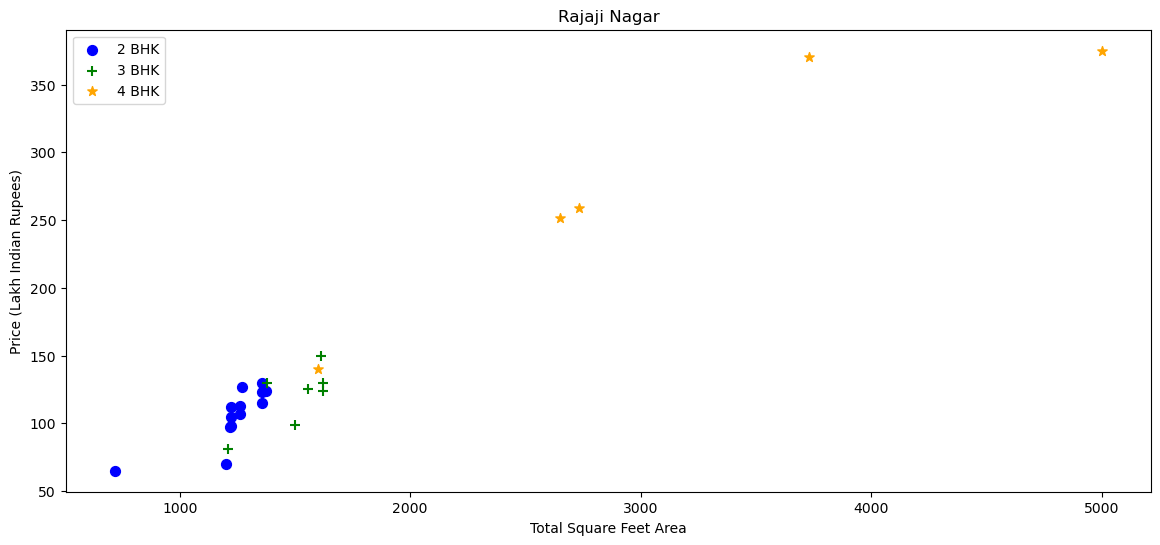

In [125]:
plot_location(df9,"Rajaji Nagar")

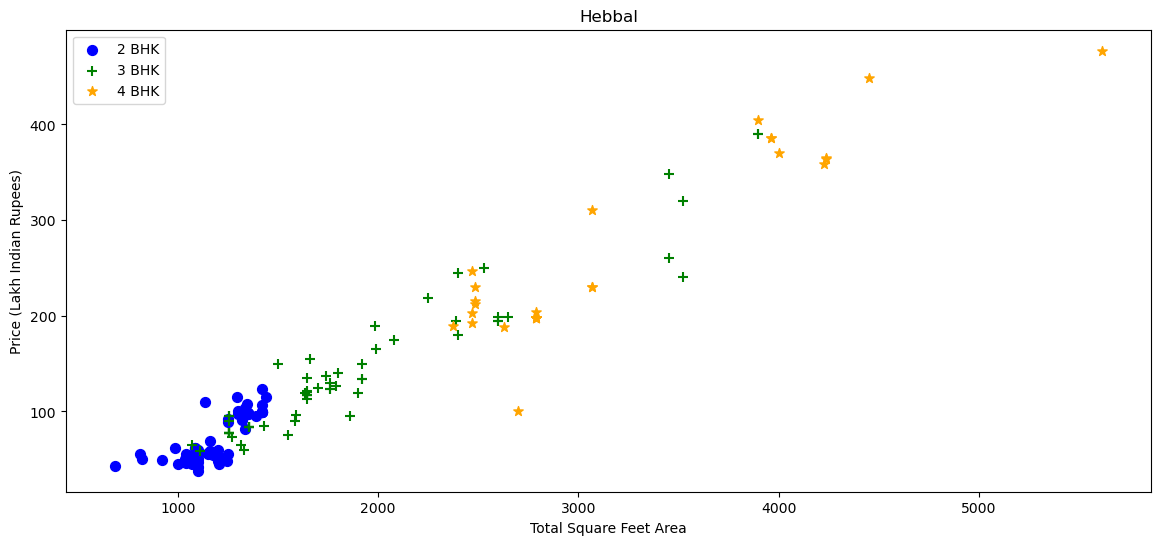

In [126]:
plot_location(df9,"Hebbal")

Some 3Bhk have area less than that of average 2Bhk area, which is not quite normal. So the function below removes such abnormal cases.

In [129]:
df9.shape

(11221, 6)

In [127]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [128]:
df10 = remove_bhk_outliers(df9)
df10.shape

(7783, 6)

## Encoding categorical variables

In [131]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7783 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        7783 non-null   object 
 1   total_sqft      7783 non-null   float64
 2   bath            7783 non-null   float64
 3   price           7783 non-null   float64
 4   bhk             7783 non-null   int64  
 5   price_per_sqft  7783 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 425.6+ KB


In [133]:
df10.drop(columns=['price_per_sqft'], inplace=True)

In [134]:
df11 = pd.get_dummies(data=df10, columns=['location'])
df11.head()

,total_sqft,bath,price,bhk,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,...,location_Varthur,location_Varthur Road,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df11.drop(columns= ['location_Other'], inplace = True)

In [158]:
df11.to_csv("house_price_cleaned.csv",index=False)

## Build a model

In [139]:
X = df11.drop(columns=['price'])
y = df11.price

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [150]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train.values ,y_train.values)

LinearRegression()

In [151]:
lr_clf.score(X_test.values ,y_test.values)

0.8776552785444192

In [152]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.92251709, 0.86821775, 0.90424845, 0.87324021, 0.87507349])

In [153]:
def get_price(location, sqft, bath, bhk):   
    location = "location_" + location
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [155]:
predict_price('1st Phase JP Nagar',18990, 2, 2)

1317.0559112381652

## Exporting model

In [160]:
import pickle
with open('house_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)


In [2]:
df = pd.read_csv('house_price_cleaned.csv')

In [3]:
df.columns

Index(['total_sqft', 'bath', 'price', 'bhk', 'location_1st Phase JP Nagar',
       'location_2nd Stage Nagarbhavi', 'location_5th Phase JP Nagar',
       'location_6th Phase JP Nagar', 'location_7th Phase JP Nagar',
       'location_8th Phase JP Nagar',
       ...
       'location_Varthur', 'location_Varthur Road', 'location_Vidyaranyapura',
       'location_Vijayanagar', 'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yeshwanthpur'],
      dtype='object', length=189)

In [4]:
cols = df.columns[4:]
cols

Index(['location_1st Phase JP Nagar', 'location_2nd Stage Nagarbhavi',
       'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar',
       'location_7th Phase JP Nagar', 'location_8th Phase JP Nagar',
       'location_9th Phase JP Nagar', 'location_Abbigere',
       'location_Akshaya Nagar', 'location_Ambalipura',
       ...
       'location_Varthur', 'location_Varthur Road', 'location_Vidyaranyapura',
       'location_Vijayanagar', 'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yeshwanthpur'],
      dtype='object', length=185)

In [7]:
a = "a_v_b_v"
a.split('_', 1)[1]

'v_b_v'

In [13]:
locations_final = [col.split('_', 1)[1] for col in cols]
locations_final

['1st Phase JP Nagar',
 '2nd Stage Nagarbhavi',
 '5th Phase JP Nagar',
 '6th Phase JP Nagar',
 '7th Phase JP Nagar',
 '8th Phase JP Nagar',
 '9th Phase JP Nagar',
 'Abbigere',
 'Akshaya Nagar',
 'Ambalipura',
 'Ambedkar Nagar',
 'Amruthahalli',
 'Anandapura',
 'Ananth Nagar',
 'Anekal',
 'Anjanapura',
 'Ardendale',
 'Arekere',
 'Attibele',
 'BTM 2nd Stage',
 'BTM Layout',
 'Babusapalaya',
 'Balagere',
 'Banashankari',
 'Banashankari Stage II',
 'Banashankari Stage III',
 'Banashankari Stage VI',
 'Banaswadi',
 'Bannerghatta',
 'Bannerghatta Road',
 'Basavangudi',
 'Basaveshwara Nagar',
 'Battarahalli',
 'Begur',
 'Begur Road',
 'Bellandur',
 'Benson Town',
 'Bhoganhalli',
 'Billekahalli',
 'Binny Pete',
 'Bisuvanahalli',
 'Bommanahalli',
 'Bommasandra',
 'Bommasandra Industrial Area',
 'Brookefield',
 'Budigere',
 'CV Raman Nagar',
 'Chandapura',
 'Channasandra',
 'Chikka Tirupathi',
 'Chikkalasandra',
 'Choodasandra',
 'Cooke Town',
 'Dasanapura',
 'Dasarahalli',
 'Devanahalli',
 'Dev

In [12]:
len(locations_final)

185

In [14]:
locations_final[0].lower()

'1st phase jp nagar'

In [15]:
import json
columns = {
    'data_columns' : [col.lower() for col in locations_final]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))